In [1]:
import FinanceDataReader as fdr

In [2]:
# Samsung (005930)
df = fdr.DataReader('005930', '2020-05-01', '2021-05-01')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-05-04,48900,49100,48500,48500,26083749,-0.030000
2020-05-06,49000,49200,48500,49200,18070225,0.014433
2020-05-07,49200,49300,48700,48800,13884411,-0.008130
2020-05-08,49100,49350,48800,48800,15319700,0.000000
2020-05-11,48900,49250,48300,48400,16357743,-0.008197
2020-05-12,48400,48500,47550,47900,23433590,-0.010331
2020-05-13,47250,48550,47200,48550,20223277,0.013570
2020-05-14,47750,48100,47650,48000,19305974,-0.011329
2020-05-15,48400,48450,47700,47850,18463118,-0.003125


## **여러 종목의 종가(Close) 가져오기**

In [3]:
stock_list = [
    ["LG전자", "066570"],
    ["삼성전자", "005930"],
    ["카카오", "035720"],
    ["SK하이닉스", "000660"],
    ["현대차", "005380"],
    ["LG화학", "051910"],
    ["POSCO", "005490"],
    ["NAVER", "035420"]
]

In [4]:
import pandas as pd

In [5]:
df_list = [fdr.DataReader(code, '2020-05-01', '2021-05-01')['Close'] for name, code in stock_list]

In [6]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

,LG전자,삼성전자,카카오,SK하이닉스,현대차,LG화학,POSCO,NAVER
Date,,,,,,,,
2020-05-04,55200,48500,37433,81000,91500,360000,178500,199000
2020-05-06,55500,49200,40043,82400,93200,361000,180000,212000
2020-05-07,54700,48800,41347,82400,92600,354000,179500,215500
2020-05-08,55200,48800,41347,85000,94500,352500,180000,214000
2020-05-11,54500,48400,41648,84500,93700,346500,176000,214500
2020-05-12,54500,47900,43053,85700,91900,338000,170000,219500
2020-05-13,55000,48550,43455,83600,93100,352000,173000,218500
2020-05-14,54200,48000,45161,80600,92300,344500,168000,219000
2020-05-15,54400,47850,44458,81900,92300,346500,168000,213000


In [12]:
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')    

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

<AxesSubplot:xlabel='Date'>

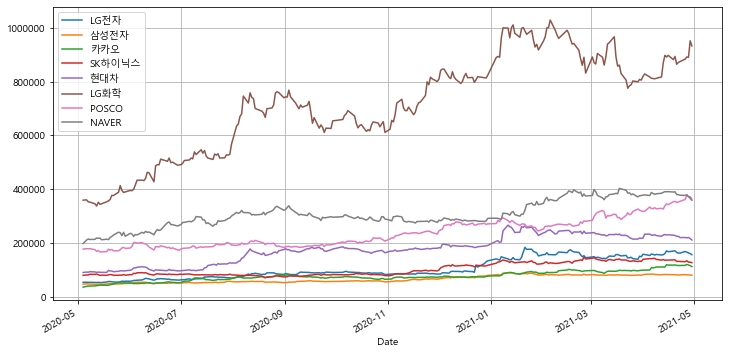

In [13]:
df.plot()

**자꾸 1000000까지 가는데**

<AxesSubplot:xlabel='Date'>

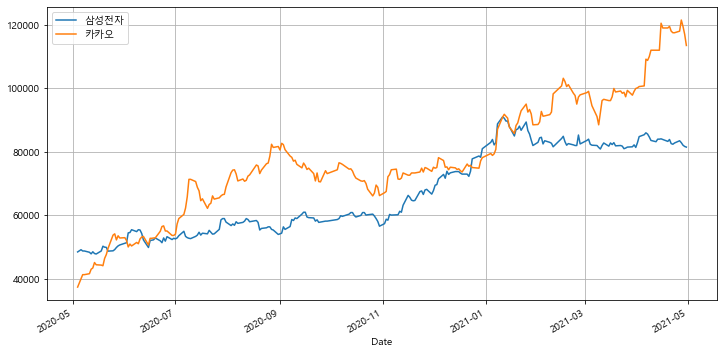

In [14]:
df[['삼성전자','카카오']].plot()

<AxesSubplot:xlabel='Date'>

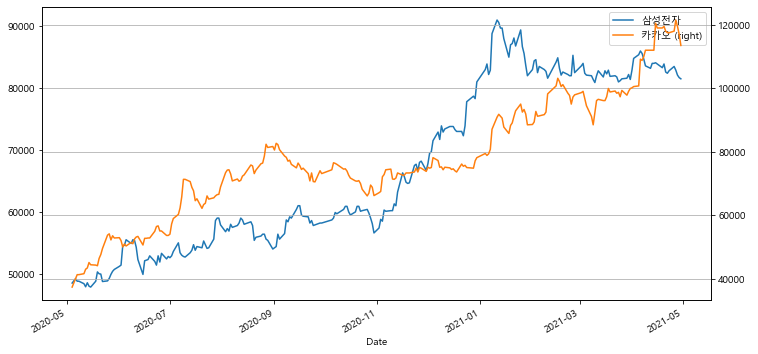

In [15]:
df[['삼성전자', '카카오']].plot(secondary_y=['카카오'])

<AxesSubplot:xlabel='Date'>

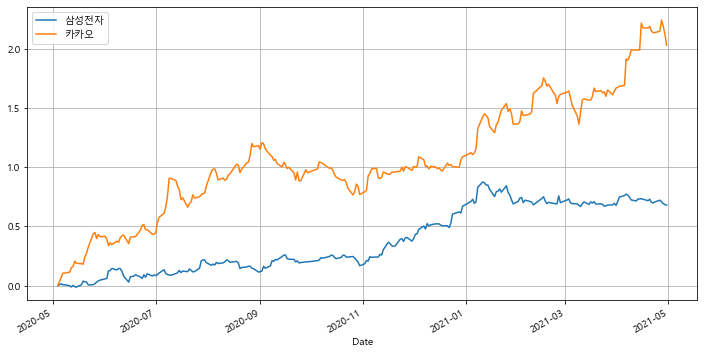

In [16]:
df2 = df[['삼성전자', '카카오']]

df_plot = df2 / df2.iloc[0] - 1.0
df_plot.plot()

### **2020년 수익률 비교**

<AxesSubplot:xlabel='Date'>

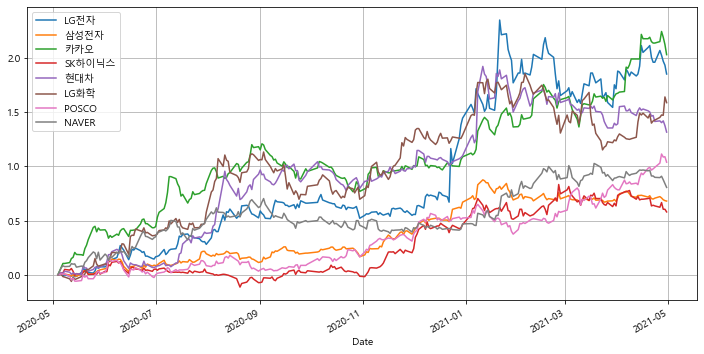

In [17]:
df_norm = df / df.iloc[0] - 1
df_norm.plot()

In [18]:
df_norm.iloc[-1].sort_values(ascending=False) # 수익률이 큰 종목부터 순으로 나열

카카오       2.032084
LG전자      1.853261
LG화학      1.588889
현대차       1.316940
POSCO     1.039216
NAVER     0.806533
삼성전자      0.680412
SK하이닉스    0.580247
Name: 2021-04-30 00:00:00, dtype: float64

**df.plot()에서 나온 graph 수치 이상 확인할 것.**